Clean Dataset - Remove stop word + Apply Lemmatization

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('training_dataset.csv')
df.shape
df.head()

,Date,URL,Title,Source,Country,LABEL
0,20240815T010000Z,https://borneobulletin.com.bn/explosions-repor...,Explosions reported near two ships off Yemen :...,borneobulletin.com.bn,Brunei,2
1,20240716T194500Z,https://www.hindustantimes.com/india-news/crew...,"Crew , including 13 Indians , still missing af...",hindustantimes.com,India,2
2,20240809T100000Z,https://www.yahoo.com/news/multiple-attacks-ta...,Multiple attacks target merchant ship off Yeme...,yahoo.com,United States,3
3,20240717T041500Z,https://timesofoman.com/article/147862-oil-tan...,Oil tanker with 13 Indians on board sinks off ...,timesofoman.com,Oman,2
4,20240812T201500Z,https://menafn.com/1108546043/Multiple-Attacks...,Multiple Attacks Target Merchant Ship Off Yemen,menafn.com,Qatar,3


In [2]:
# Import necessary libraries for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean title (remove stop words and lemmatize)
def clean_title(title):
    # Tokenize the title
    tokens = nltk.word_tokenize(title)
    
    # Remove punctuation and stop words, then apply lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens 
                      if word.lower() not in stop_words and word not in string.punctuation]
    
    # Join tokens back to a single string
    cleaned_title = ' '.join(cleaned_tokens)
    return cleaned_title

# Apply the cleaning function to the 'Title' column
df['Cleaned_Title'] = df['Title'].apply(clean_title)

# Display the cleaned data
df[['Cleaned_Title', 'LABEL']].head()

# Export the cleaned data to a new CSV file
#df.to_csv('updated_news_titles.csv', index=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Regin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Regin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Regin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Cleaned_Title,LABEL
0,explosion reported near two ship yemen securit...,2
1,crew including 13 indian still missing oil tan...,2
2,multiple attack target merchant ship yemen uni...,3
3,oil tanker 13 indian board sink oman coast,2
4,multiple attack target merchant ship yemen,3


In [3]:
#Support Vector Machine (SVM) Algorithm

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Ensure the 'Cleaned_Title' and 'LABEL' columns are present in the dataset
assert 'Cleaned_Title' in df.columns and 'LABEL' in df.columns, "The dataset must have 'Cleaned_Title' and 'LABEL' columns."

# Convert the 'LABEL' column to string format if necessary
df['LABEL'] = df['LABEL'].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Title'], df['LABEL'], test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train an SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Function for classifying new titles using the trained model
def classify_new_title(title):
    title_tfidf = vectorizer.transform([title])
    prediction = svm_model.predict(title_tfidf)
    return prediction[0]

# Example prediction
example_title = "Tanker in Red Sea Targeted by Speedboat Gunfire"
predicted_category = classify_new_title(example_title)
print("Predicted Category:", predicted_category)

Accuracy: 0.616822429906542
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
          10       1.00      0.25      0.40         4
          11       0.71      0.28      0.40        18
          12       0.52      0.64      0.57        50
          13       0.00      0.00      0.00         1
           2       0.63      0.83      0.72        29
           3       0.70      0.98      0.82        51
           4       0.44      0.60      0.51        20
           5       0.00      0.00      0.00         1
           6       1.00      0.46      0.63        13
           7       0.00      0.00      0.00         5
           8       1.00      0.09      0.17        11
           9       0.00      0.00      0.00         5

    accuracy                           0.62       214
   macro avg       0.54      0.33      0.35       214
weighted avg       0.63      0.62      0.57       214

Predicted Category: 3


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [4]:
# Support Vector Machine (SVM) Algorithm

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Ensure the 'Cleaned_Title' and 'LABEL' columns are present in the dataset
assert 'Cleaned_Title' in df.columns and 'LABEL' in df.columns, "The dataset must have 'Cleaned_Title' and 'LABEL' columns."

# Convert the 'LABEL' column to string format if necessary
df['LABEL'] = df['LABEL'].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Title'], df['LABEL'], test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train an SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Add predictions to the test data
X_test = X_test.reset_index(drop=True)  # Reset index to align with predictions
test_data_with_predictions = pd.DataFrame(X_test, columns=['Cleaned_Title'])
test_data_with_predictions['Predicted_Label'] = y_pred

# Save the entire test data with predictions to a CSV file
test_data_with_predictions.to_csv('svm_predictions.csv', index=False)

# Display the first few rows to verify
print(test_data_with_predictions.head())

# Function for classifying new titles using the trained model
def classify_new_title(title):
    title_tfidf = vectorizer.transform([title])
    prediction = svm_model.predict(title_tfidf)
    return prediction[0]

# Example prediction
example_title = "Tanker in Red Sea Targeted by Speedboat Gunfire"
predicted_category = classify_new_title(example_title)
print("Predicted Category:", predicted_category)

Accuracy: 0.616822429906542
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
          10       1.00      0.25      0.40         4
          11       0.71      0.28      0.40        18
          12       0.52      0.64      0.57        50
          13       0.00      0.00      0.00         1
           2       0.63      0.83      0.72        29
           3       0.70      0.98      0.82        51
           4       0.44      0.60      0.51        20
           5       0.00      0.00      0.00         1
           6       1.00      0.46      0.63        13
           7       0.00      0.00      0.00         5
           8       1.00      0.09      0.17        11
           9       0.00      0.00      0.00         5

    accuracy                           0.62       214
   macro avg       0.54      0.33      0.35       214
weighted avg       0.63      0.62      0.57       214

                           

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validati

[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   0.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   0.0s
Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.5934579439252337
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.17      0.22         6
          10       0.50      0.25      0.33         4
          11       0.60      0.33      0.43        18
          12       0.50      0.52      0.51        50
          13       0.00      0.00      0.00         1
           2       0.61      0.76      0.68        29
           3       0.72      0.96      0.82        51
           4       0.41      0.60      0.49        20
           5       0.00      0.00      0.00         1
           6       0.75      0.46      0.57        13
           7       0.00      0.00      0.00         5
           8       0.80      0.36      0.50        11
           9       0.00      0.00      0.00         5

    accuracy                    

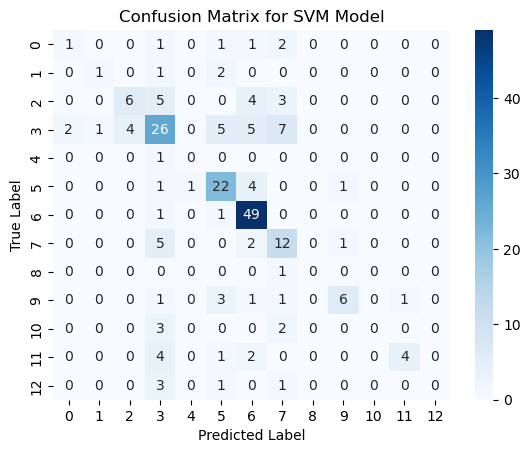

In [5]:
#Refine SVM Model : Hyperparameter Tuning & Model Evaluation

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Ensure the 'Cleaned_Title' and 'LABEL' columns are present in the dataset
assert 'Cleaned_Title' in df.columns and 'LABEL' in df.columns, "The dataset must have 'Cleaned_Title' and 'LABEL' columns."

# Convert the 'LABEL' column to string format if necessary
df['LABEL'] = df['LABEL'].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Title'], df['LABEL'], test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_tfidf, y_train)

# Best parameters from GridSearch
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best model on the test set
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_tfidf)

# Calculate and print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
